# 🥣 Food Nutrition Analysis
## Objective
In this section, we analyze the relationship between vitamins and minerals in different food categories,  
evaluate nutrient sufficiency using government-issued daily doses, and reflect on how these findings  
influence personal dietary choices.

In [1]:
import pandas as pd
import numpy as np

In [2]:
food_df = pd.read_csv('food.csv')
food_df.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


## Food Items per Category
For each category, we count the number of food items and visualize the 15 most common categories.

                                Category  Count
56                                  BEEF    457
814                                 PORK    304
180                          CEREALS RTE    291
33                              BABYFOOD    220
529                                 LAMB    198
..                                   ...    ...
365                               FENNEL      1
741      PASTA W/MEATBALLS IN TOMATO SAU      1
742  PASTA W/SLICED FRANKS IN TOMATO SAU      1
743                             PASTRAMI      1
591                          MAMMY-APPLE      1

[1183 rows x 2 columns]


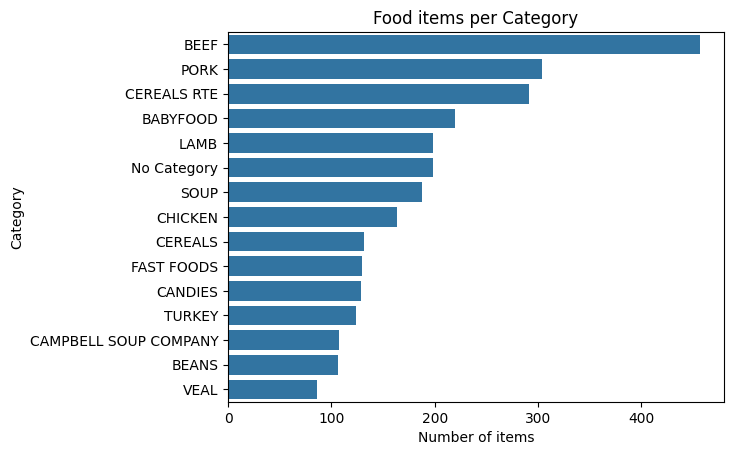

In [ ]:
category_food_items_cnt = food_df.groupby('Category')["Description"].nunique().reset_index().rename(columns={"Description": "Count"})
category_food_items_cnt_sorted = category_food_items_cnt.sort_values("Count", ascending=False)

# print(category_food_items_cnt_sorted)

import matplotlib.pyplot as plt
import seaborn as sns

bar,ax = plt.subplots()
ax = sns.barplot(x="Count", y="Category", data=category_food_items_cnt_sorted.head(15))
ax.set_title("Food items per Category")
ax.set_xlabel("Number of items")
ax.set_ylabel("Category")

plt.savefig("items_per_category.pdf", bbox_inches="tight")
plt.show()

From the top 15 categories with the highest number of food items, we can see that Beef (457) has a large gap compared to the second category, Pork (304). There is also a “No Category” group, indicating missing data entries. Overall, the dataset appears imbalanced, with several outliers such as Beef, which contains a disproportionately large number of food items compared to others.

## Scatterplot for Two Random Categories
We randomly select two categories and visualize one vitamin (Vitamin C) and one mineral (Sodium) using color-coded scatterplots.

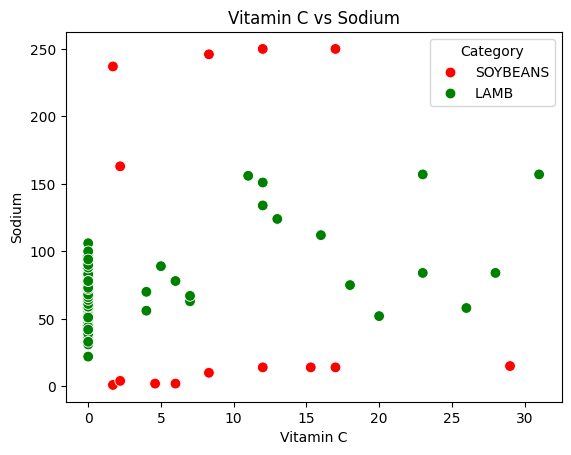

In [4]:
# Q3
# Sodium    Vitamin C
my_cat = food_df['Category'].sample(2, random_state=79).tolist()
my_data = food_df[food_df['Category'].isin(my_cat)]

plt.figure()
sns.scatterplot(
    data=my_data,
    x="Data.Vitamins.Vitamin C",
    y="Data.Major Minerals.Sodium",
    hue="Category",
    palette = ("red", "green"),
    s=60
)
plt.title("Vitamin C vs Sodium")
plt.xlabel("Vitamin C")
plt.ylabel("Sodium")

plt.savefig("vitamin_mineral_2_categories.pdf", bbox_inches="tight")
plt.show()

Most Soybean items cluster near low sodium values but show a wide variation in Vitamin C. On the other hand, Lamb items form two distinct groups — those with no Vitamin C at all and those with high sodium content. This reflects clear nutritional differences: Soybeans contribute more plant-based vitamins, whereas Lamb items are primarily high in sodium and low in vitamins.

## Labeling Data by Daily Dose Requirements
We pick five categories we commonly eat and check which foods meet at least 25% of the government’s recommended daily nutrient dose.


In [5]:
# Q5
# minerals: Sodium      Magnesium
# vitamins: Vitamin B12   Vitamin E
# 5 Categories: BEEF    MILK    COFFEE  RICE    CEREALS
# https://nutritionsource.hsph.harvard.edu/vitamins/

gov_daily_dose = {'Data.Major Minerals.Sodium': 1500, 
                  'Data.Major Minerals.Magnesium': 310, 
                  'Data.Vitamins.Vitamin B12': 2.4, 
                  'Data.Vitamins.Vitamin E': 15}
# Vitamin B12 ~micrograms
# Magnesium, Sodium, Vitamin E ~milligrams

categories = ['BEEF', 'MILK', 'COFFEE', 'RICE', 'CEREALS']
minerals_and_vitamins = ['Data.Major Minerals.Sodium', 
                         'Data.Major Minerals.Magnesium',
                         'Data.Vitamins.Vitamin B12', 
                         'Data.Vitamins.Vitamin E']

sub_food_df = food_df[food_df['Category'].isin(categories)].copy()
sub_food_df = sub_food_df[["Category", "Description"] + minerals_and_vitamins]
per_meal_target = {k: (v/4) for k, v in gov_daily_dose.items()} #4 meals/day


for col in minerals_and_vitamins:
    thresh = per_meal_target[col]
    sub_food_df[f"Daily.Dose.{col}"] = (sub_food_df[col] >= thresh).fillna(False)

daily_dose_cols = [f"Daily.Dose.{col}" for col in minerals_and_vitamins]
sub_food_df["Label"] = np.where(sub_food_df[daily_dose_cols].all(axis=1), 1, 0)

sub_food_df.head()

,Category,Description,Data.Major Minerals.Sodium,Data.Major Minerals.Magnesium,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin E,Daily.Dose.Data.Major Minerals.Sodium,Daily.Dose.Data.Major Minerals.Magnesium,Daily.Dose.Data.Vitamins.Vitamin B12,Daily.Dose.Data.Vitamins.Vitamin E,Label
57,MILK,"MILK,FILLED,FLUID,W/BLEND OF HYDR VEG OILS",57,13,0.34,0.00,False,False,False,False,0
58,MILK,"MILK,FILLED,FLUID,W/LAURIC ACID OIL",57,13,0.34,0.13,False,False,False,False,0
69,MILK,"MILK,WHL,3.25% MILKFAT",40,10,0.44,0.06,False,False,False,False,0
70,MILK,"MILK,PRODUCER,FLUID,3.7% MILKFAT",49,13,0.36,0.00,False,False,False,False,0
71,MILK,"MILK,RED FAT,FLUID,2%MILKFAT,W/ADDED VIT A",41,11,0.46,0.03,False,False,False,False,0


In [6]:
sub_food_df.groupby("Category")["Label"].value_counts().unstack(fill_value=0)

Label,0,1
Category,,
BEEF,457,0
CEREALS,130,2
COFFEE,15,0
MILK,40,0
RICE,29,0


In [7]:
sub_food_df[sub_food_df['Label'] == 1]

,Category,Description,Data.Major Minerals.Sodium,Data.Major Minerals.Magnesium,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin E,Daily.Dose.Data.Major Minerals.Sodium,Daily.Dose.Data.Major Minerals.Magnesium,Daily.Dose.Data.Vitamins.Vitamin B12,Daily.Dose.Data.Vitamins.Vitamin E,Label
2061,CEREALS,"CEREALS,QUAKER,INST OATMEAL,NUTR FOR WOMEN,VAN...",638,89,2.93,11.55,True,True,True,True,1
2062,CEREALS,"CEREALS,QUAKER,INST OATMEAL,NUTR FOR WOMEN,GLD...",706,97,2.87,11.30,True,True,True,True,1


## Pairplot by Class Labels
We plot relationships among nutrients separately for each label.

In [8]:
from sklearn.model_selection import train_test_split

X=sub_food_df[minerals_and_vitamins]
Y=sub_food_df["Label"]
X_train , X_test , y_train , y_test = train_test_split(X, Y, train_size=0.5, random_state=577)

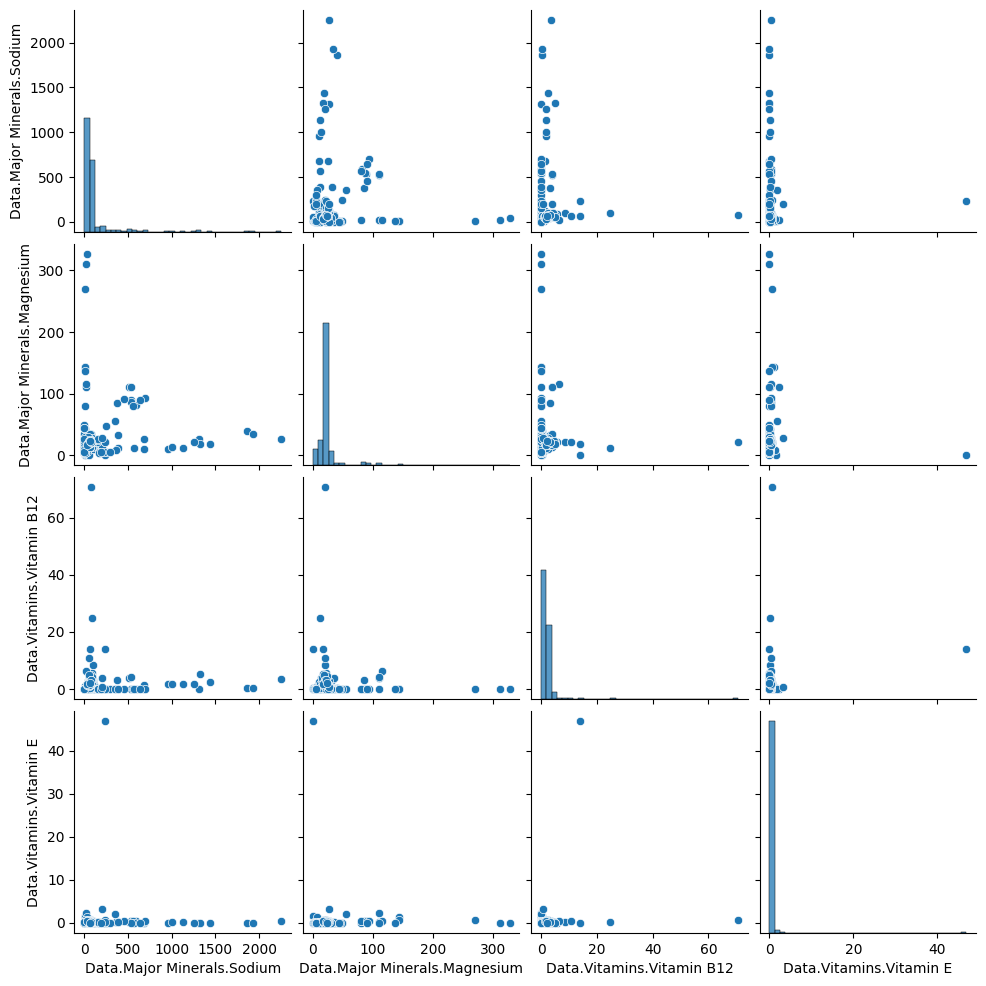

In [9]:
train_df = X_train.copy()
train_df["Label"] = y_train

sns.pairplot(
    data = train_df[train_df["Label"]==0],
    vars = minerals_and_vitamins)

plt.savefig("zero_food.pdf", bbox_inches="tight")
plt.show()

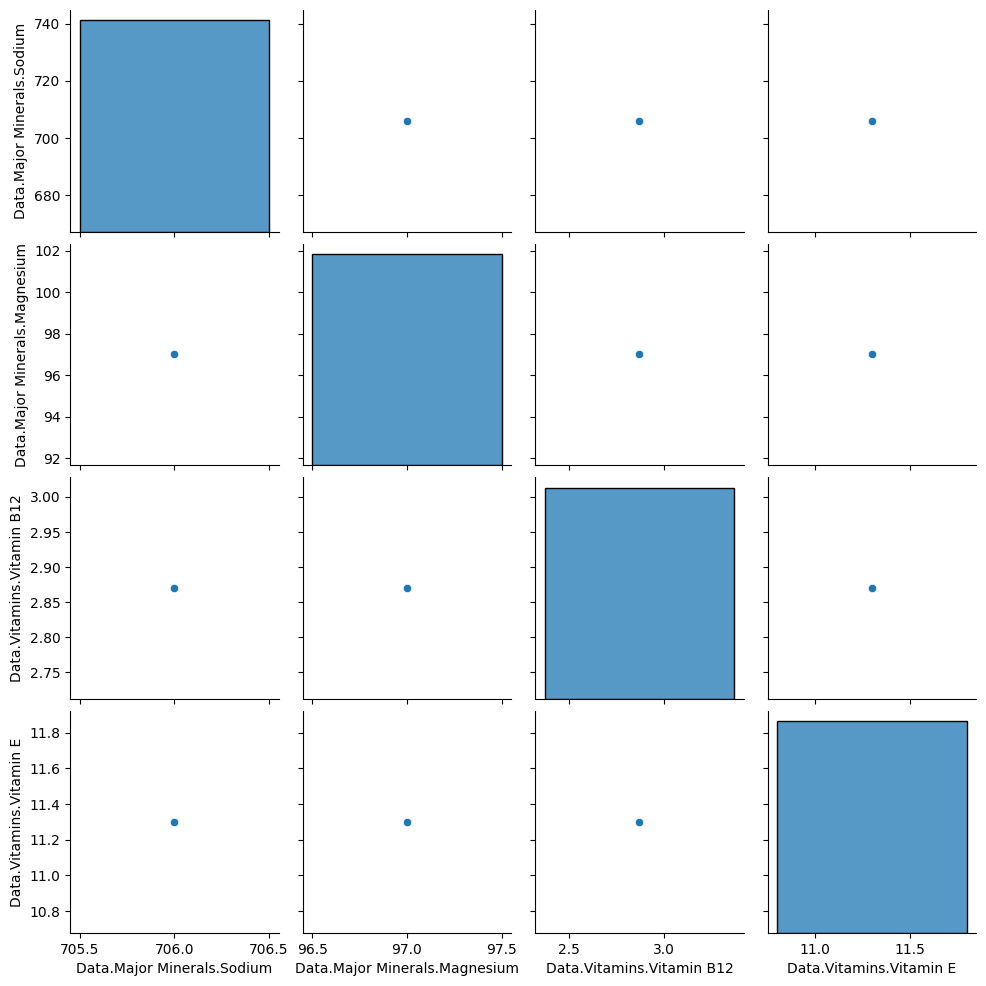

In [10]:
sns.pairplot(
    data = train_df[train_df["Label"]==1],
    vars = minerals_and_vitamins)

plt.savefig("one_food.pdf", bbox_inches="tight")
plt.show()

The dataset is highly imbalanced, with only two food items meeting the daily nutrient requirements
All other items (label = 0) show very low concentrations of Sodium, Magnesium, Vitamin B12, and Vitamin E — none reach even 25 % of the recommended daily intake, and Vitamin E levels are almost zero across the majority of samples.

A simple rule based on visual analysis to get label 1: Sodium>500 or Magnesium>80 or Vitamin B12>=2

In [11]:
# Q7
Y_pred = np.where(
    (X_test["Data.Major Minerals.Sodium"] > 500) |
    (X_test["Data.Major Minerals.Magnesium"] > 80) |
    ((X_test["Data.Vitamins.Vitamin B12"] >= 2)),
    1,
    0 
)
Y_pred = pd.Series(Y_pred, index=X_test.index, name="Y_pred")
Y_pred.value_counts()

Y_pred
1    171
0    166
Name: count, dtype: int64

In [12]:
# Q8-10
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_auc_score

cf = confusion_matrix(y_test, Y_pred)
# print(cf)
tn, fp, fn, tp = cf.ravel()

tpr = recall_score(y_test, Y_pred)
tnr = tn / (tn + fp) if (tn + fp) > 0 else 0
acc = accuracy_score(y_test, Y_pred)


summary = pd.DataFrame([{
    "TP": tp,
    "FP": fp,
    "TN": tn,
    "FN": fn,
    "accuracy": round(acc, 3),
    "TPR": round(tpr, 3),
    "TNR": round(tnr, 3)
}])
display(summary)

auc = roc_auc_score(y_test, Y_pred)
print("AUC = ", round(auc, 3))

,TP,FP,TN,FN,accuracy,TPR,TNR
0,1,170,166,0,0.496,1.0,0.494


AUC =  0.747


The AUC score is more than 0.5, suggesting the model is better than random guessing. However, because the dataset is highly imbalanced and nearly all test samples belong to class 0, even a small number of correctly predicted 0-labels can inflate both the AUC and the overall accuracy.

In [13]:
minerals_and_vitamins

['Data.Major Minerals.Sodium',
 'Data.Major Minerals.Magnesium',
 'Data.Vitamins.Vitamin B12',
 'Data.Vitamins.Vitamin E']

In [14]:
# Q11
m1, m2, v1, v2 = minerals_and_vitamins

def stats(df):
    return([
        np.mean(df[v1]), np.std(df[v1]),
        np.mean(df[v2]), np.std(df[v2]),
        np.mean(df[m1]), np.std(df[m1]),
        np.mean(df[m2]), np.std(df[m2])
    ])

sum_table = pd.DataFrame(
    [stats(train_df[train_df["Label"] == 0]),
     stats(train_df[train_df["Label"] == 1]),
     stats(train_df)
    ],
    index=["0", "1", "all"],
    columns=["μ(v1)","σ(v1)","μ(v2)","σ(v2)","μ(m1)","σ(m1)","μ(m2)","σ(m2)"]
)

display(sum_table)


,μ(v1),σ(v1),μ(v2),σ(v2),μ(m1),σ(m1),μ(m2),σ(m2)
0,1.976567,4.313358,0.363672,2.564034,124.823881,267.355890,27.146269,32.739398
1,2.870000,0.000000,11.300000,0.000000,706.000000,0.000000,97.000000,0.000000
all,1.979226,4.307210,0.396220,2.628613,126.553571,268.828383,27.354167,32.911355


Class 0 foods have low levels of Vitamin B12 and near-zero values of Vitamin E. Their mineral levels (Sodium and Magnesium) are also relatively low.
Class 1 foods show very high concentrations of Sodium and Magnesium

Additionally, the standard deviation for Class 0 is high, suggesting a wide variation in nutrient levels among low-nutrient foods.

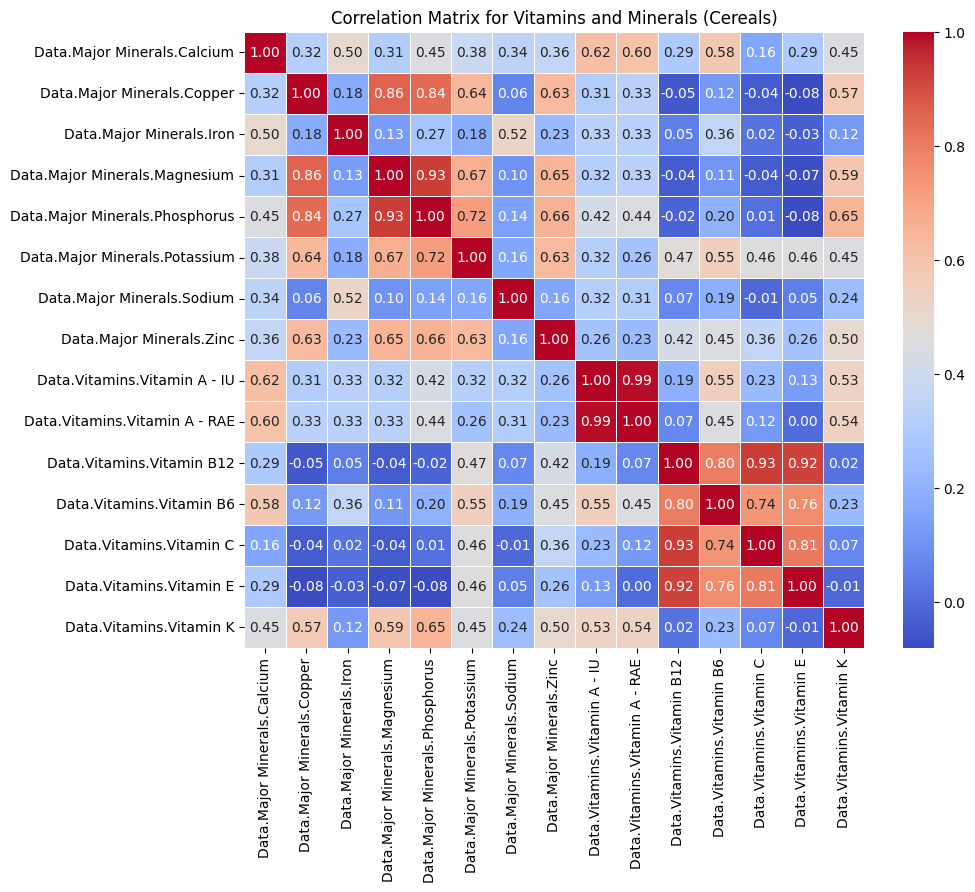

In [15]:
# Q13

# food_df.columns
min_vit_cols = ['Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium',
       'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium',
       'Data.Major Minerals.Sodium', 'Data.Major Minerals.Zinc',
       'Data.Vitamins.Vitamin A - IU', 'Data.Vitamins.Vitamin A - RAE',
       'Data.Vitamins.Vitamin B12', 'Data.Vitamins.Vitamin B6',
       'Data.Vitamins.Vitamin C', 'Data.Vitamins.Vitamin E',
       'Data.Vitamins.Vitamin K']


cor_table = food_df[food_df['Category'] == 'CEREALS'][min_vit_cols].corr().round(2)


plt.figure(figsize=(10, 8))
sns.heatmap(cor_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Vitamins and Minerals (Cereals)")
plt.show()

In the plot above we can see heatmap representing linear relationship between vitamins and minerals for Cereals category. 
- The strongest positive correlations are observed between: Magnesium and Phosphorus (0.93), Vitamin C and Vitamin B12 (0.93), Vitamin E and Vitamin B12 (0.92)
- The weakest negative correlations: Vitamin E and Copper (-0.08), Vitamin E and Phosphorus(-0.08), Vitamin E and Magnesium (-0.07)

After this findings, I realized that mostly none of the foods meet daily nutrient requirements. And only certain cereal products (such as Quaker) provide balanced levels of essential vitamins and minerals. 